In [1]:
import numpy as np

In [2]:
!pip install -q timm transformers torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.5 MB/s eta 0:00:00


In [3]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.6 MB/s eta 0:00:00


In [6]:
from ultralytics import RTDETR

# Choose one: 'rtdetr-l.pt' | 'rtdetr-x.pt' | 'rtdetr-s.pt'
model = RTDETR('rtdetr-l.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 63.4M/63.4M [00:00<00:00, 82.7MB/s]


100%|██████████| 134k/134k [00:00<00:00, 15.7MB/s]


image 1/1 /content/bus.jpg: 640x640 4 persons, 1 bus, 1 traffic light, 1 fire hydrant, 2 ties, 88.7ms
Speed: 12.6ms preprocess, 88.7ms inference, 22.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


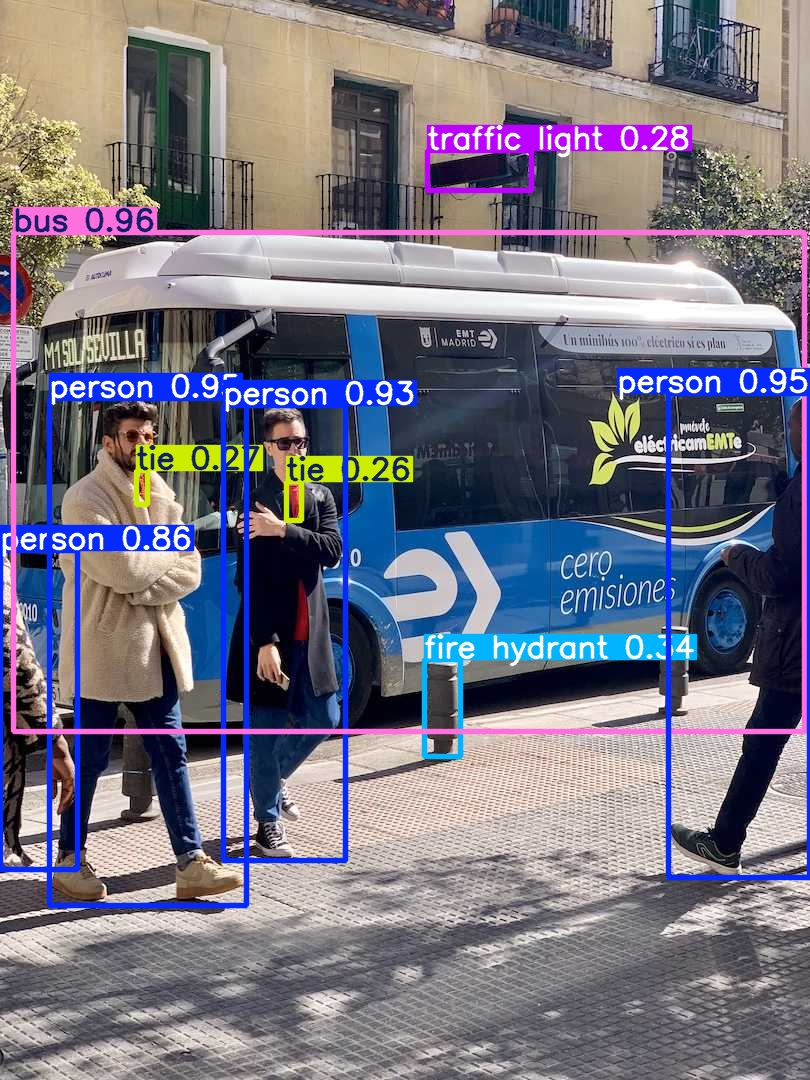

In [7]:
from IPython.display import Image

# Test on an online image
model.predict('https://ultralytics.com/images/bus.jpg', save=True)

# Display
Image(filename='runs/detect/predict/bus.jpg')


In [8]:
from ultralytics import YOLO

# Load YOLOv8 extra-large pretrained model
yolo_model = YOLO('yolov8x.pt')


100%|██████████| 131M/131M [00:01<00:00, 76.3MB/s]


In [9]:
crowded_url = "https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg"


In [10]:
rtdetr_result = model.predict(crowded_url, save=True, name="rtdetr_output")


100%|██████████| 165k/165k [00:00<00:00, 11.2MB/s]

image 1/1 /content/zidane.jpg: 640x640 2 persons, 2 ties, 71.8ms
Speed: 11.7ms preprocess, 71.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/rtdetr_output


In [11]:
yolo_result = yolo_model.predict(crowded_url, save=True, name="yolo_output")



Found https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 65.6ms
Speed: 5.6ms preprocess, 65.6ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/yolo_output


RT-DETR Result:


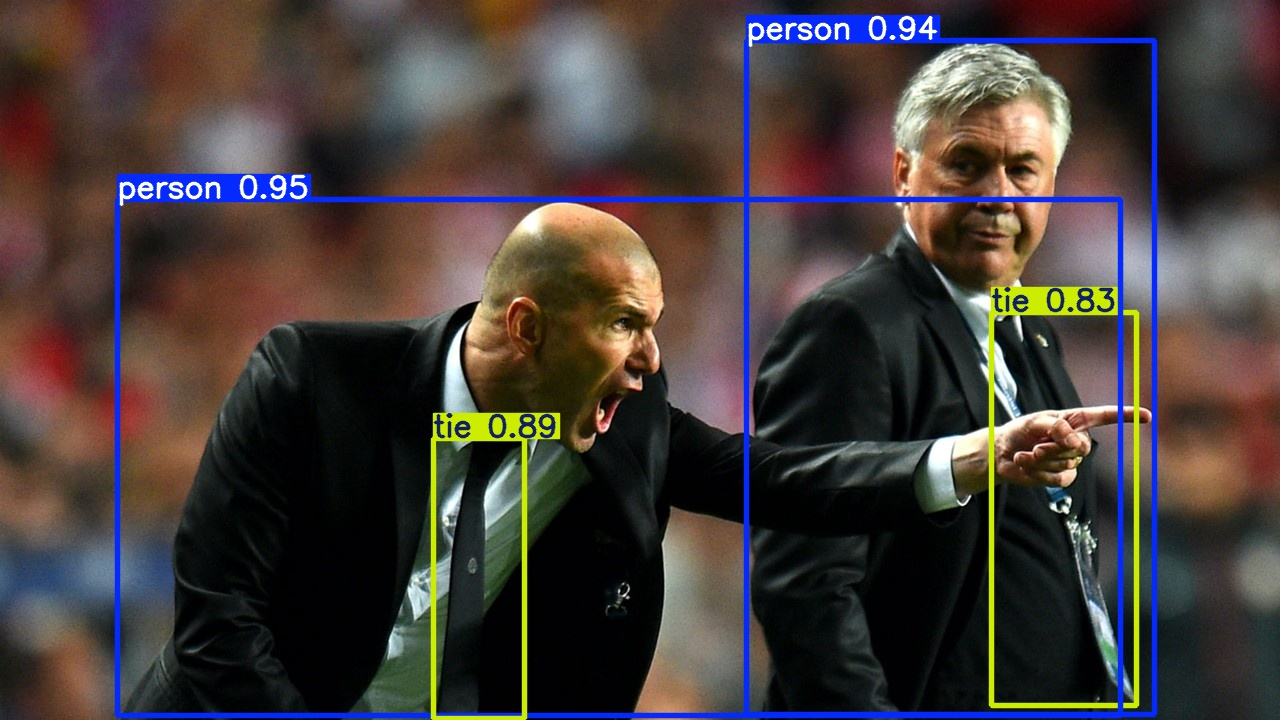

In [12]:
from IPython.display import Image

# RT-DETR Output
print("RT-DETR Result:")
Image(filename='runs/detect/rtdetr_output/zidane.jpg')


YOLOv8 Result:


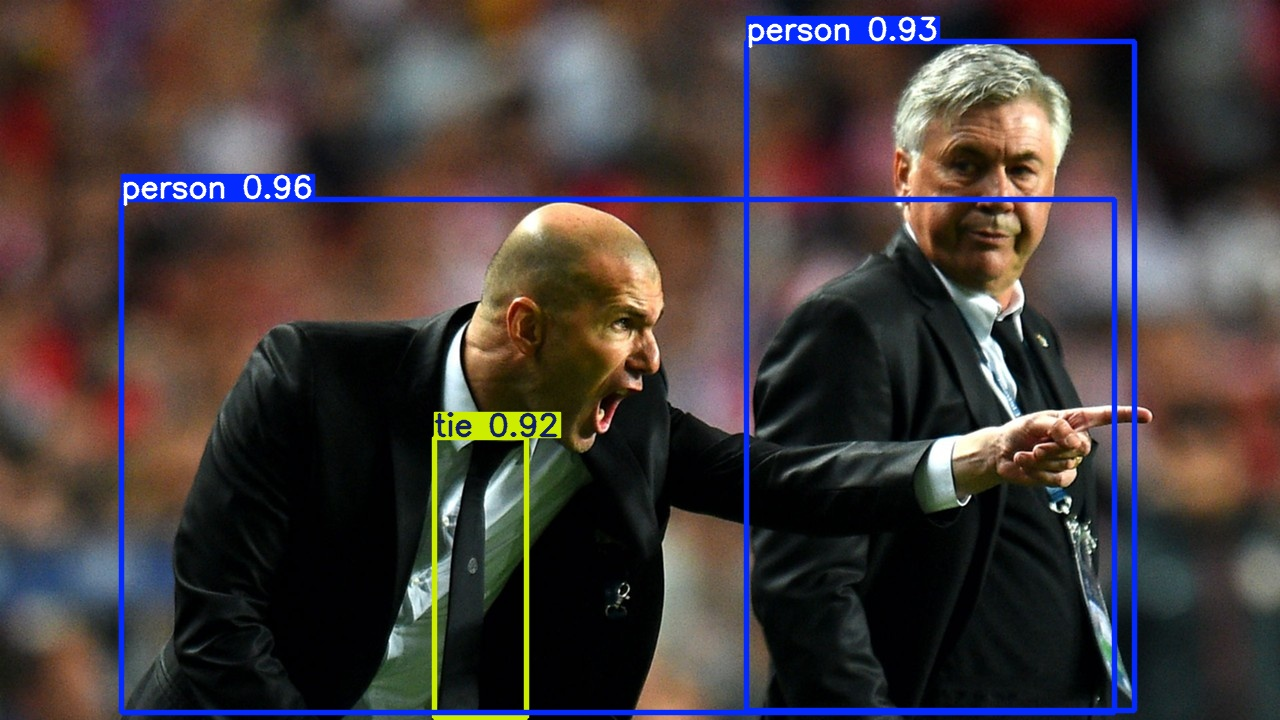

In [13]:
# YOLOv8 Output
print("YOLOv8 Result:")
Image(filename='runs/detect/yolo_output/zidane.jpg')


- Notice the DETR is able to detect the second tie.
- RT-DETR gives a bigger bounding box for the right person that includes the left person’s pointing finger. How do we know if RT-DETR thinks the finger belongs to the right person?

In [15]:
import requests

url = "https://images.unsplash.com/photo-1573358695783-005699a7fc94?fm=jpg&q=60&w=3000"
img_name = "crowd2.jpg"

with open(img_name, 'wb') as f:
    f.write(requests.get(url).content)



WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [16]:
# RT-DETR prediction
rtdetr_result = model.predict(img_name, save=True, name="rtdetr_crowd2")

# YOLOv8 prediction
yolo_result = yolo_model.predict(img_name, save=True, name="yolo_crowd2")



WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/crowd2.jpg: 640x640 56 persons, 4 traffic lights, 1 stop sign, 5 umbrellas, 4 handbags, 1 tie, 1 cup, 1 cell phone, 89.8ms
Speed: 5.6ms preprocess, 89.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/rtdetr_crowd2

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Vid

RT-DETR Result:


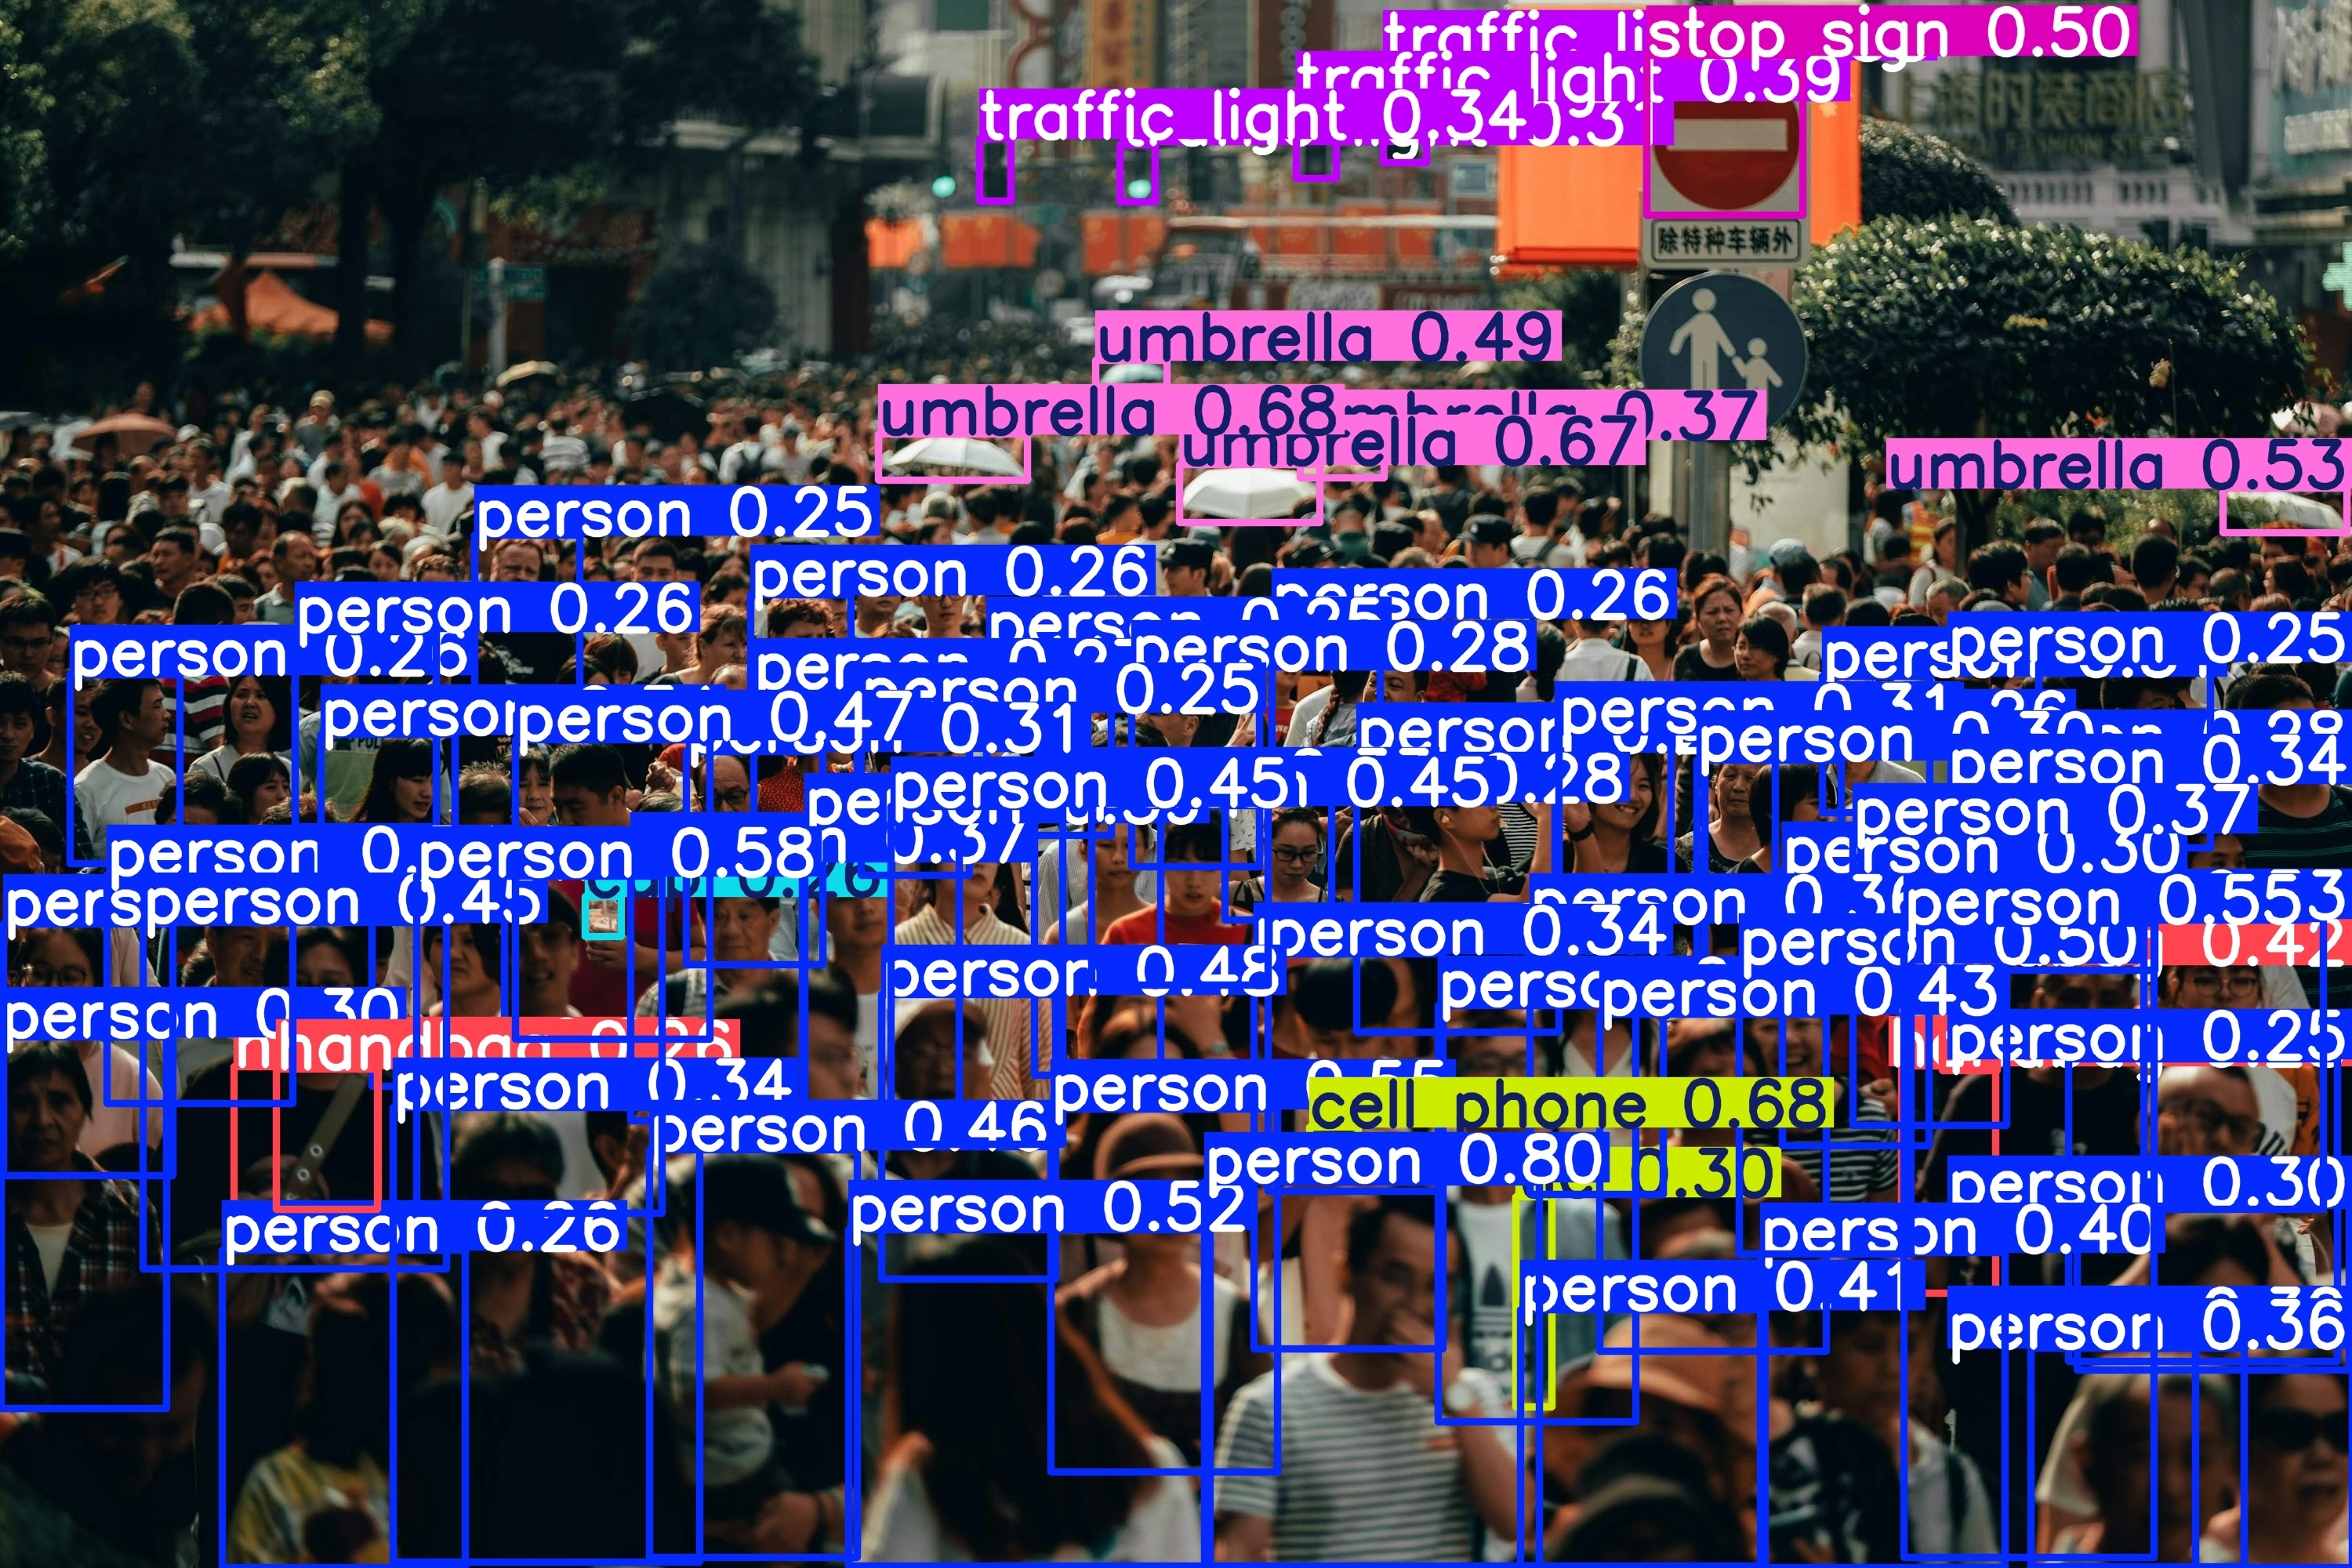

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [18]:
from IPython.display import Image, display

print("RT-DETR Result:")
display(Image(filename="runs/detect/rtdetr_crowd2/crowd2.jpg"))



YOLOv8 Result:


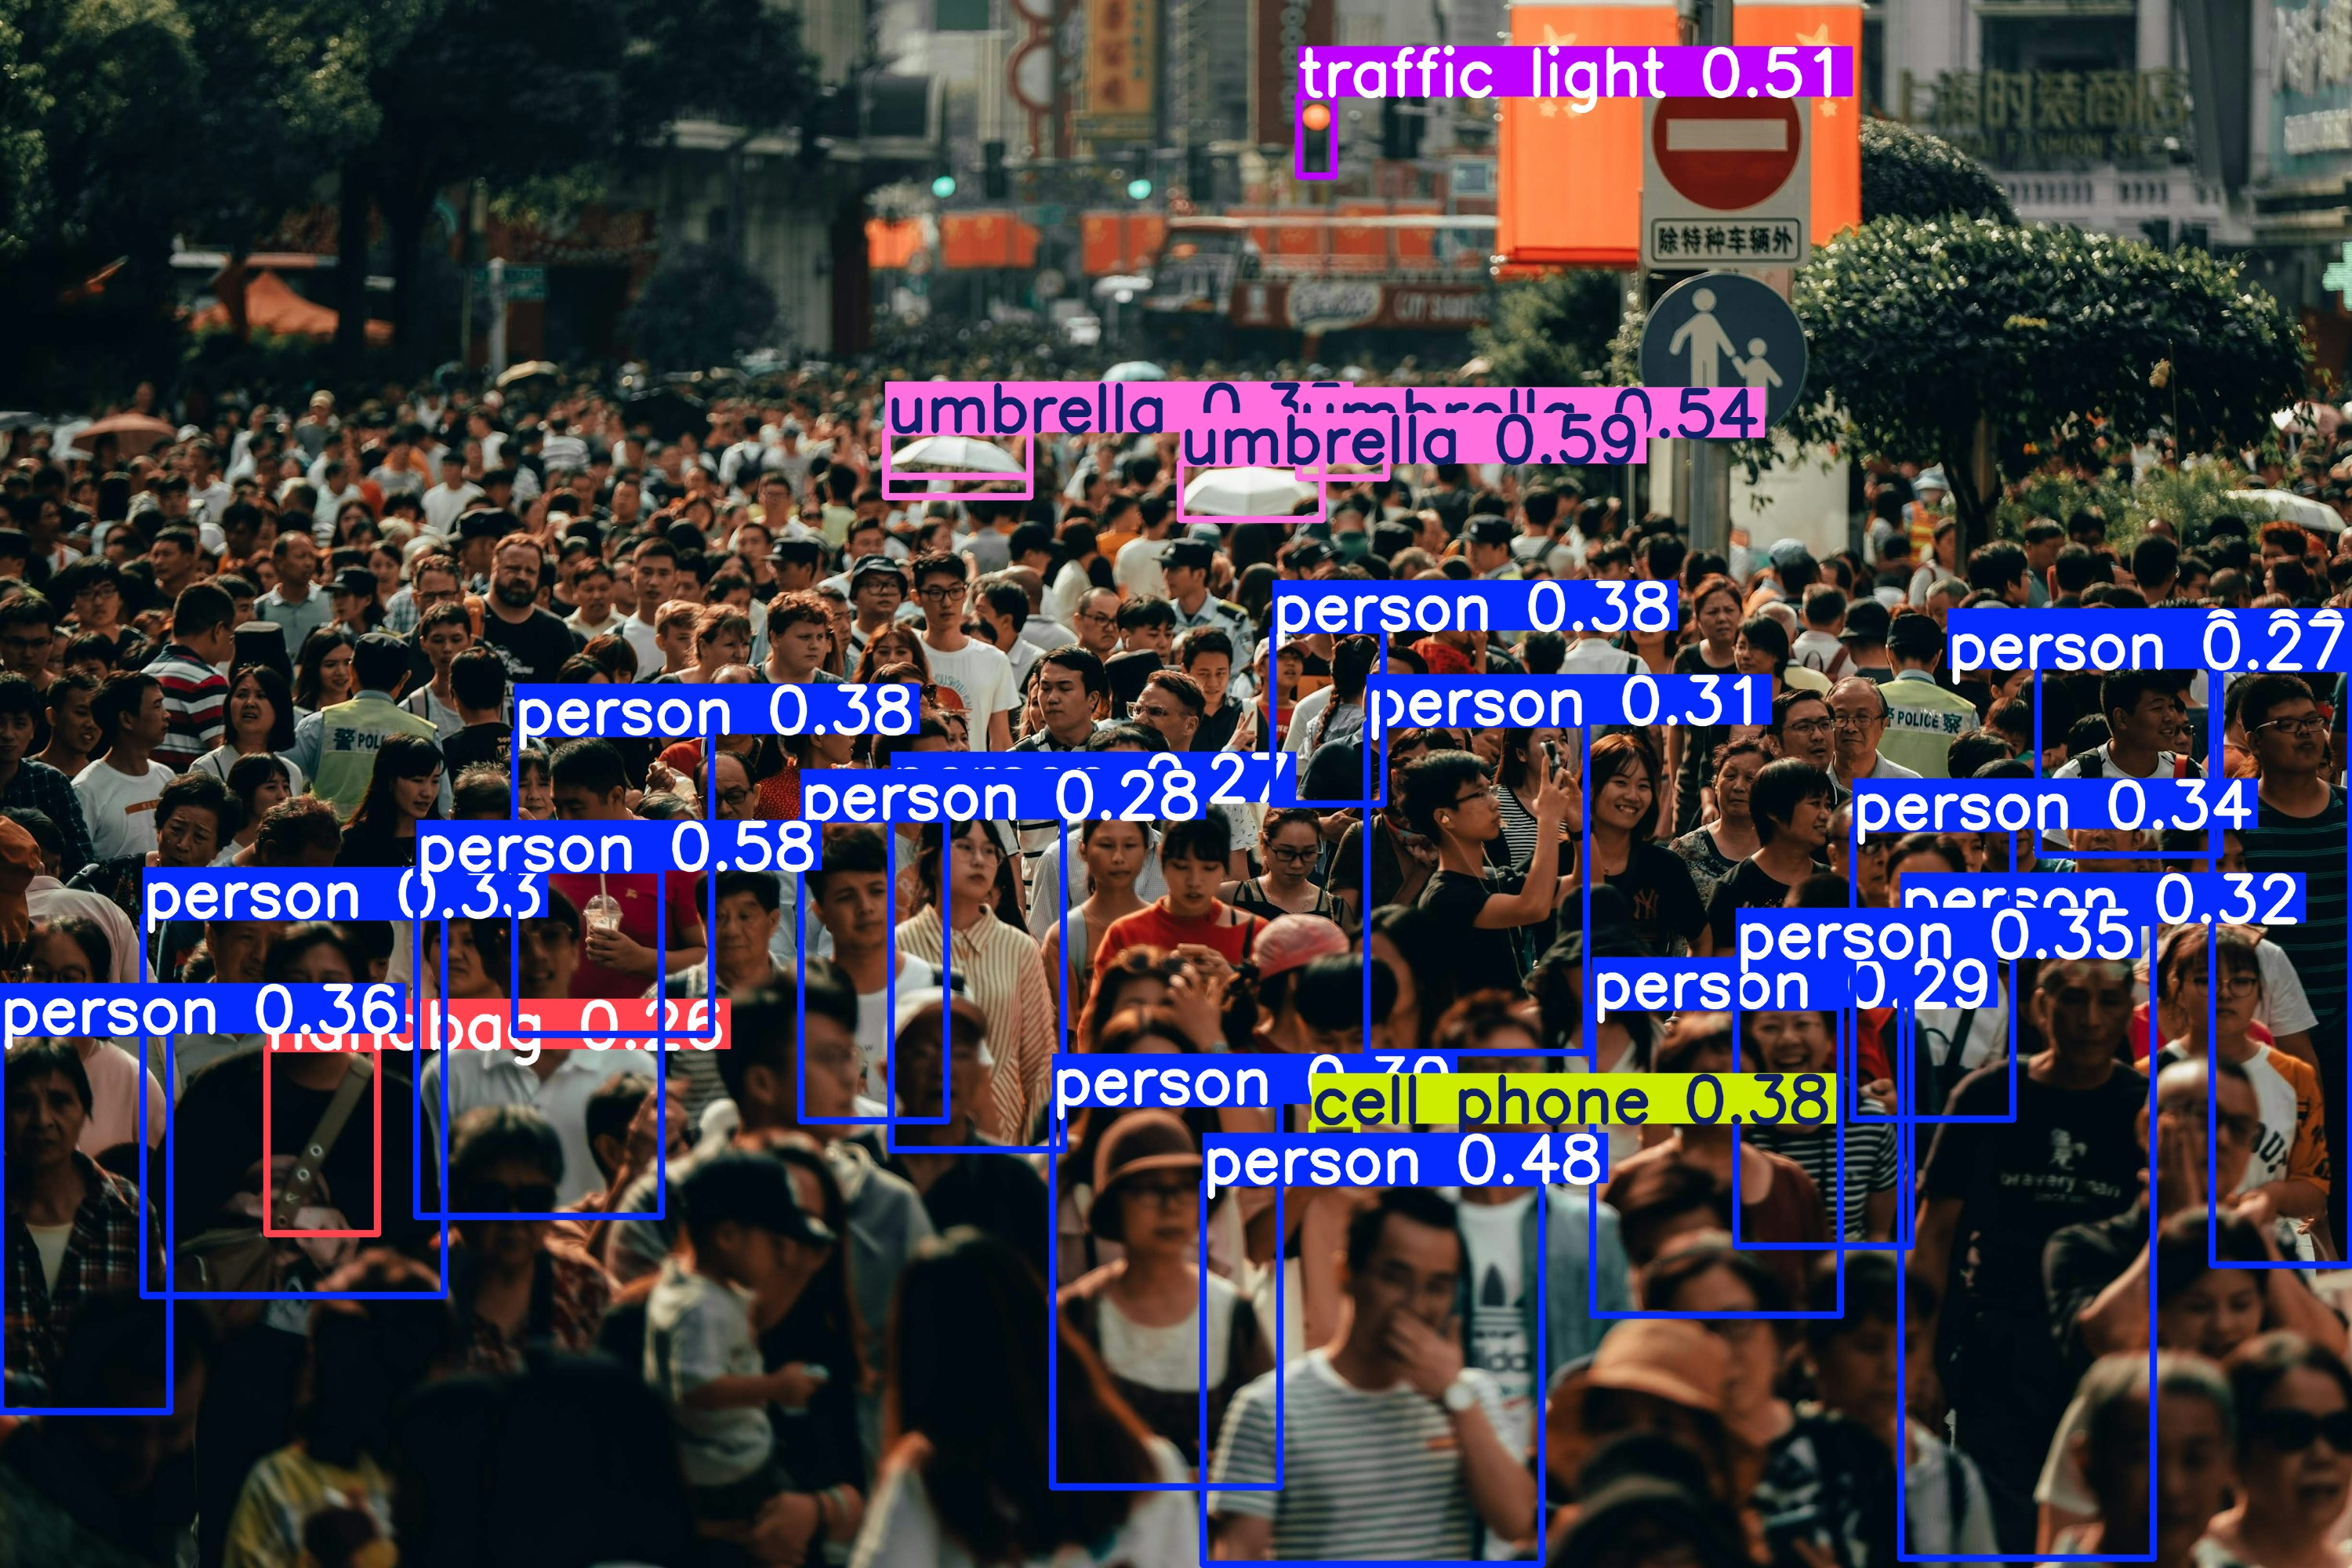

In [19]:

print("YOLOv8 Result:")
display(Image(filename="runs/detect/yolo_crowd2/crowd2.jpg"))

Rt-Detr does much much better with overlapping objects but is limited by the number of object queries it was training on, for more object queries, we will need to fine tune or pre train again